In [114]:
## Basic MLE curve fitting with choice of solver & error model
## as a response to a question in the class on April 18, 2020, AC
## Jan Nagler, adapted
import numpy as np
from scipy.optimize import minimize
import pylab as py
%matplotlib inline 

#create, define or load your data here, e.g. a histogram
ydata = np.array([0.13,0.15,0.23,0.32,0.72,0.86,0.98, 0.99, 0.95])
xdata = np.array(range(0,len(ydata),1))

In [115]:
#define your function here, with parameters
def function(params,  x):
    beta = params[0]
    x0   = params[1]
    #return x0+x*beta # linear
    return 1 / (1 + np.exp(-beta*(x-x0))) # sigmoid
    #return np.exp(-abs(beta)*(x-x0)**2) # gaussian 
    #return abs(x-x0)**beta # power law

In [116]:
# keep sigma for MLE fitting as the last
# (additional) parameter
def fitfunction(params):
    sigma = params[2] # last parameter has to be std dev of error
    # Calculate negative log likelihood
    # the "error model" is here gaussian
    # you can change to other choices than stats.norm.logpdf, e.g., binomial, etc
    LL = -np.sum( stats.norm.logpdf(ydata, loc=function(params, xdata), scale=sigma) )
    #if LL<-5: print(sigma, np.exp(LL)) # output convergence process, if helpful
    return(LL)

 final_simplex: (array([[0.99898267, 3.29477847, 0.05811306],
       [0.99893484, 3.29471772, 0.05811058],
       [0.99891985, 3.29477024, 0.05811271],
       [0.99893146, 3.29473801, 0.05811566]]), array([-12.83817411, -12.83817411, -12.83817408, -12.83817406]))
           fun: -12.838174114367352
       message: 'Optimization terminated successfully.'
          nfev: 181
           nit: 100
        status: 0
       success: True
             x: array([0.99898267, 3.29477847, 0.05811306])


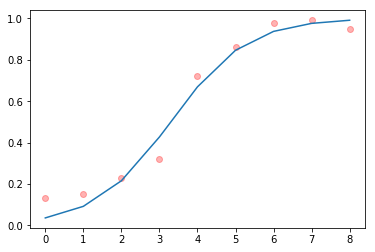

In [117]:
initParams = [1, 1, 1] # start somewhere

#nelder mead is fast and universal but may get stuck in local minima
#you can use other solvers to find minimum in parameter space
results = minimize( fitfunction, initParams, method='Nelder-Mead')
print (results)

estParms = results.x
yfit = function(estParms, xdata)

py.clf()
py.plot(xdata, ydata, 'ro', alpha=0.3)
py.plot(xdata, yfit)
py.show()

#quick for recalling MLE
#https://towardsdatascience.com/a-gentle-introduction-to-maximum-likelihood-estimation-9fbff27ea12f